In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [4]:
salary = pd.Series([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

Среднее арифметическое

In [10]:
salary_mean = salary.sum() / salary.count() 
salary_mean

65.3

Cреднее квадратичное отклонение

In [19]:
salary_std = np.math.sqrt(((salary - salary_mean) ** 2).sum() / (salary.count() - 1))
salary_std

31.624607341019814

Смещенная дисперсия

In [12]:
salary_var = ((salary - salary_mean) ** 2).sum() / salary.count()
salary_var

950.11

Несмещенная дисперсия

In [21]:
salary_var0 = ((salary - salary_mean) ** 2).sum() / (salary.count() - 1)
salary_var0

1000.1157894736842

In [34]:
pd.DataFrame([(salary_mean, salary.mean()),
              (salary_std, salary.std()),
              (salary_var, salary.var(ddof=0)),
              (salary_var0, salary.var(ddof=1))],
              columns=['manual', 'pandas'], 
              index=['mean', 'std', 'var', 'var0'])

,manual,pandas
mean,65.300000,65.300000
std,31.624607,31.624607
var,950.110000,950.110000
var0,1000.115789,1000.115789


#### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [49]:
q1 = salary.quantile(0.25)
q3 = salary.quantile(0.75)
iqr = q3 - q1
q1, q3, iqr

(42.0, 81.0, 39.0)

In [50]:
outliers = salary[(salary < (q1 - 1.5 * iqr)) | (salary > (q3 + 1.5 * iqr))]
outliers.count()

1

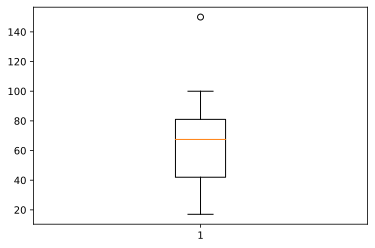

In [59]:
plt.boxplot(salary)
plt.show()

#### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [76]:
p_c = 0.5 # Вероятность того, что студент учится на факультете С
p_a = p_b = (1 - p_c) / 2 # Вероятность того, что студент учится на факультете A или В

In [79]:
p_pos_a = 0.8
p_pos_b = 0.7
p_pos_c = 0.9

In [83]:
p_pos = p_a * p_pos_a + p_b * p_pos_b + p_c * p_pos_c 
p_pos # Полная вероятность того, что студент сдаст сессию

0.825

Используем теорему Байеса

In [85]:
p_a_pos = p_a * p_pos_a / p_pos
p_b_pos = p_b * p_pos_b / p_pos
p_c_pos = p_c * p_pos_c / p_pos
p_a_pos, p_b_pos, p_c_pos

(0.24242424242424246, 0.21212121212121213, 0.5454545454545455)